In [20]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV, Lasso, Ridge, RidgeClassifier, SGDClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, precision_recall_fscore_support, f1_score, r2_score 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint, gamma as sp_gamma, expon as sp_expon, uniform as sp_uniform
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
import cPickle as pickle

In [2]:
def open_prepper(file_path):
    """Open the DataPrepper from pickled file."""
    with open(file_path) as f:
        prepper = pickle.load(f)
    return prepper

file_path = '../data/store/data_prepper_ALL-CATEGORIES.pkl'
prepper = open_prepper(file_path)

X_train, y_train = prepper.return_training_data()
X_test, y_test = prepper.return_testing_data()

### IMAGE VIEW QUANTILES

#### GBC

In [5]:
model_ivq_GBC = GradientBoostingClassifier(loss='deviance', learning_rate=0.2793, n_estimators=500, subsample=0.878,
                                           min_samples_split=10, min_samples_leaf=10, min_weight_fraction_leaf=0.0,
                                           max_depth=5, init=None, random_state=None, max_features='auto', verbose=1,
                                           max_leaf_nodes=12, warm_start=True, presort='auto')

In [6]:
model_ivq_GBC.fit(X_train, y_train['image_views_quantized'])

      Iter       Train Loss      OOB Improve   Remaining Time 
         1      175577.5086        1545.6529         1117.02m
         2      169624.4471         834.6579         1120.62m
         3      165508.1553         532.6932         1098.15m
         4      162650.7832         367.7260         1096.96m
         5      160505.9044         279.5297         1100.38m
         6      158584.9172         252.0923         1103.86m
         7      157068.6581         172.5057         1101.86m
         8      156045.1083         120.6247         1095.72m
         9      154925.5663         114.5406         1090.68m
        10      154021.7192         119.5260         1084.94m
        20      147199.8696          35.3135         1047.69m
        30      143770.3274          17.7463          991.35m
        40      140833.7218           3.2083          936.78m
        50      138466.6431           1.8888          891.19m
        60      136399.5583           5.6201          850.81m
       

GradientBoostingClassifier(init=None, learning_rate=0.2793, loss='deviance',
              max_depth=5, max_features='auto', max_leaf_nodes=12,
              min_samples_leaf=10, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=0.878,
              verbose=1, warm_start=True)

In [8]:
model_ivq_GBC.score(X_test, y_test['image_views_quantized'])

0.52645742622157721

In [12]:
with open('./classification_model_GBC_ALL-CATEGORIES_500.pkl', 'w') as f:
    pickle.dump(model_ivq_GBC, f)

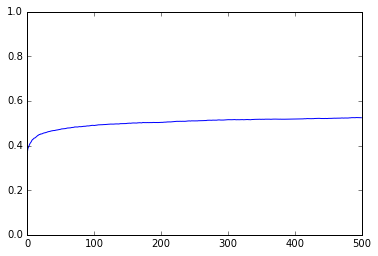

In [13]:
f1_scores = []
num_estimators = model_ivq_GBC.get_params()['n_estimators']
for i, y_pred in zip(range(1, num_estimators+1), model_ivq_GBC.staged_predict(X_test)):
    f1_scores.append(f1_score(y_test['image_views_quantized'], y_pred, labels=None, pos_label=None, average='weighted', sample_weight=None))
plt.ylim((0,1.0))
plt.plot(f1_scores, 'b')

#### AdaBoost Classifier

In [23]:
model_ivq_adaboost = AdaBoostClassifier(base_estimator=None, n_estimators=500, learning_rate=1.0,
                                        algorithm='SAMME.R', random_state=None)

In [24]:
model_ivq_adaboost.fit(X_train, y_train['image_views_quantized'])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=500, random_state=None)

In [25]:
model_ivq_adaboost.score(X_test, y_test['image_views_quantized'])

0.39867561683599417

In [ ]:
with open('./classification_model_adaboost_ALL-CATEGORIES_50.pkl', 'w') as f:
    pickle.dump(model_ivq_GBC, f)

#### KNearest Neighbors

In [32]:
model_ivq_KNN = KNeighborsClassifier(n_neighbors=100, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                                     metric='minkowski', metric_params=None, n_jobs=20)

In [33]:
model_ivq_KNN.fit(X_train, y_train['image_views_quantized'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=20, n_neighbors=100, p=2,
           weights='uniform')

In [34]:
model_ivq_KNN.score(X_test, y_test['image_views_quantized'])

0.34781688437348812